In [1]:
import pandas as pd

from lets_plot import *


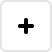
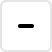
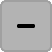
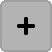
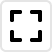
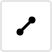
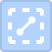
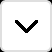
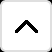
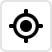
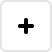
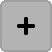
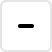
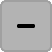
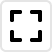
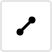
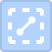
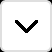
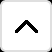
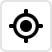

In [2]:
LetsPlot.setup_html()
LetsPlot.set_theme(theme_light())

In [3]:
mpg_df = pd.read_csv('https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv')
mpg_df.head(4)

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact


In [4]:
gggrid([
    ggplot(mpg_df, aes('class')) + geom_bar(labels=layer_labels().line('@..count..')),
    ggplot(mpg_df, aes('class')) + geom_bar(labels=layer_labels().line('@..count..')) + coord_flip()
])


In [5]:
annotation = (layer_labels()
               # .line('@drv')
                .line('@..count..')
                .line('@..proppct..')
                .format('..proppct..', '{d}%'))

In [6]:
p = ggplot(mpg_df, aes('class', fill='drv')) + theme(legend_position='none')
p_flipped = p + coord_flip()

In [7]:
p + geom_bar(labels=annotation, tooltips='none')

In [8]:
p_flipped + geom_bar(labels=annotation, tooltips='none')

In [9]:
p + geom_bar(labels=annotation, tooltips='none', position='fill')

In [10]:
p_flipped + geom_bar(labels=annotation, tooltips='none', position='fill')

In [11]:
p + geom_bar(labels=annotation, tooltips='none', position='dodge')

In [12]:
p_flipped + geom_bar(labels=annotation, tooltips='none', position='dodge')

In [13]:
# from https://r-graph-gallery.com/341-stacked-barplot-with-negative-values.html

df = pd.read_csv('https://raw.githubusercontent.com/holtzy/R-graph-gallery/master/DATA/stacked_barplot_negative_values.csv')
df.head()

,x,groupA,groupB,groupC,groupD
0,Jan,12,19,-9,2
1,Feb,16,21,-13,8
2,Mar,23,21,-24,9
3,Apr,38,34,25,23
4,May,42,46,34,26


In [14]:
data = df.melt(id_vars=['x'], value_vars=['groupA', 'groupB', 'groupC', 'groupD'],
               var_name='group', value_name='value')

month_order = sorted(df['x'].unique())

data['x'] = pd.Categorical(data['x'], categories=month_order, ordered=True)
data.head()

,x,group,value
0,Jan,groupA,12
1,Feb,groupA,16
2,Mar,groupA,23
3,Apr,groupA,38
4,May,groupA,42


In [15]:
p1 = ggplot(data, aes('x', 'value', fill='group')) + \
        geom_bar(stat='identity', 
                 labels=layer_labels().line('@value').size(11), 
                 tooltips='none',
                 color='pen', size=0.3) + \
        geom_hline(yintercept=0, tooltips='none') + \
        theme(line=element_blank()) + theme(legend_position='none') +  \
        scale_fill_brewer(palette='Set3')

gggrid([p1, p1 + coord_flip()])

In [16]:
p2 = ggplot(data, aes('x', 'value', fill='group')) + \
        geom_bar(stat='identity', position='fill',
                 labels=layer_labels().line('@value'), 
                 tooltips='none',
                 color='pen', size=0.3) + \
        geom_hline(yintercept=0, tooltips='none') + \
        theme(line=element_blank()) + theme(legend_position='none') +  \
        scale_fill_brewer(palette='Set3')

gggrid([p2, p2 + coord_flip()])